In [1]:
import os
from tqdm import tqdm
import pickle
import random

import pandas as pd
import numpy as np
import scipy
from sklearn.metrics.pairwise import pairwise_kernels
import matplotlib.pyplot as plt

import metaspace
import linex2metaspace as lx2m

Package 'lynx' (LipidLynxX) not available. Lipid name conversions will not be possible.


# Coloc evaluation

Using Swisslipids datasets and compare against LINEX2 networks

#### Load data

In [2]:
ion_lookup = pd.read_csv('/g/alexandr/tim/metaspace_evaluation/backups/ion.tsv', sep='\t', header=None).rename(columns={0:'id', 1:'ion', 2:'formula', 3:'adduct', 4:'charge', 7:'ionFormula'}).drop(columns=[5,6])

/tmp/ipykernel_93/1630403933.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  ion_lookup = pd.read_csv('/g/alexandr/tim/metaspace_evaluation/backups/ion.tsv', sep='\t', header=None).rename(columns={0:'id', 1:'ion', 2:'formula', 3:'adduct', 4:'charge', 7:'ionFormula'}).drop(columns=[5,6])


In [3]:
ion_lookup

,id,ion,formula,adduct,charge,ionFormula
0,1,C10H11N4O7P+K+,C10H11N4O7P,+K,1,C10H11N4O7PK
1,2,C10H11NO+Na+,C10H11NO,+Na,1,C10H11NONa
2,3,C10H12ClNO4+H+,C10H12ClNO4,+H,1,C10H13NO4Cl
3,4,C10H14N5O7P+H+,C10H14N5O7P,+H,1,C10H15N5O7P
4,5,C10H14N5O7P+K+,C10H14N5O7P,+K,1,C10H14N5O7PK
...,...,...,...,...,...,...
1015290,1015554,C7H7NO4S+H+,C7H7NO4S,+H,1,C7H8NO4S
1015291,1015555,C7H9NO5S+H+,C7H9NO5S,+H,1,C7H10NO5S
1015292,1015556,C8H5F3N2O1S1+H+,C8H5F3N2O1S1,+H,1,C8H6N2OSF3
1015293,1015557,C8H6Cl1N1O2+K+,C8H6Cl1N1O2,+K,1,C8H6NO2ClK


In [4]:
ion_lookup.shape

(1015295, 6)

In [5]:
len(set(ion_lookup['ion']))

999669

**One id always maps to one ion**

### Workflow

* Recompute colocalizations
* Potentially normalize colozalizations per dataset (to accound for datasets with very high colocalizations, take ration between connected and not connected, maybe shortest path length)

In [6]:
dss = pickle.load(open('/g/alexandr/tim/metaspace_evaluation/backups/all_datasets_300922.pickle', 'rb'))

In [7]:
dss[2345].database_details

[<24:LipidMaps:2017-12-12>, <26:SwissLipids:2018-02-02>, <22:HMDB:v4>]

In [8]:
dss[2345].id

'2021-02-18_00h37m38s'

In [9]:
tmp = dss[2345].all_annotation_images(fdr=0.1, database=26, only_first_isotope=False, scale_intensity=False, hotspot_clipping=False)
ion_array = np.array([sum(x._images[0]).flatten() for x in tmp])
pd.DataFrame(pairwise_kernels(ion_array, metric='cosine'), columns = [x.formula + x.adduct for x in tmp], index=[x.formula + x.adduct for x in tmp])

100%|████████████████████████████████████████| 59/59 [00:05<00:00, 10.81it/s]


,C42H82NO8P+K,C42H82NO8P+H,C42H82NO8P+Na,C39H79N2O6P+K,C45H78NO7P+Na,C40H80NO8P+K,C39H79N2O6P+H,C47H95N2O6P+Na,C39H79N2O6P+Na,C45H91N2O6P+Na,...,C24H48NO6P+H,C44H80NO8P+Na,C43H87N2O6P+Na,C24H50NO7P+Na,C39H73O8P+Na,C47H80NO7P+Na,C45H78NO10P+Na,C47H93N2O6P+Na,C46H86NO8P+Na,C42H82NO11P+Na
C42H82NO8P+K,1.000000,0.896296,0.993784,0.899324,1.000000,0.961927,0.916134,0.979614,0.939622,0.983512,...,0.985221,0.995187,0.974811,0.971777,0.963049,0.993923,0.991942,0.979443,0.987712,0.982163
C42H82NO8P+H,0.896296,1.000000,0.932833,0.929391,0.896296,0.907065,0.986752,0.849979,0.957958,0.883957,...,0.944209,0.899261,0.891704,0.946224,0.948897,0.859728,0.902759,0.870314,0.851878,0.945618
C42H82NO8P+Na,0.993784,0.932833,1.000000,0.921822,0.993784,0.966083,0.945833,0.968297,0.959959,0.979018,...,0.992796,0.992758,0.975247,0.980985,0.976399,0.979871,0.987243,0.972082,0.975797,0.989852
C39H79N2O6P+K,0.899324,0.929391,0.921822,1.000000,0.899324,0.968042,0.954060,0.900623,0.983332,0.934805,...,0.939119,0.914216,0.949772,0.965584,0.932369,0.864453,0.917083,0.929359,0.880897,0.935563
C45H78NO7P+Na,1.000000,0.896296,0.993784,0.899324,1.000000,0.961927,0.916134,0.979614,0.939622,0.983512,...,0.985221,0.995187,0.974811,0.971777,0.963049,0.993923,0.991942,0.979443,0.987712,0.982163
C40H80NO8P+K,0.961927,0.907065,0.966083,0.968042,0.961927,1.000000,0.931561,0.956038,0.966603,0.975678,...,0.969018,0.967731,0.980819,0.981194,0.944754,0.940632,0.975005,0.973977,0.948821,0.971280
C39H79N2O6P+H,0.916134,0.986752,0.945833,0.954060,0.916134,0.931561,1.000000,0.893503,0.981927,0.922073,...,0.965814,0.925838,0.929411,0.971662,0.966239,0.887081,0.922900,0.910941,0.889285,0.958486
C47H95N2O6P+Na,0.979614,0.849979,0.968297,0.900623,0.979614,0.956038,0.893503,1.000000,0.933436,0.995003,...,0.969220,0.986718,0.987696,0.964784,0.938293,0.981835,0.974962,0.995318,0.993256,0.958189
C39H79N2O6P+Na,0.939622,0.957958,0.959959,0.983332,0.939622,0.966603,0.981927,0.933436,1.000000,0.959224,...,0.975410,0.951582,0.965484,0.986170,0.978090,0.914881,0.942948,0.950913,0.923003,0.963339
C45H91N2O6P+Na,0.983512,0.883957,0.979018,0.934805,0.983512,0.975678,0.922073,0.995003,0.959224,1.000000,...,0.981773,0.989898,0.996513,0.981455,0.956576,0.976291,0.982306,0.998433,0.986966,0.972857


In [63]:
scipy.signal.medfilt2d(tmp[0]._images[0]).flatten().shape

(8175,)

In [54]:
sum(tmp[0]._images[0])

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.8431377e-03,
       3.5294119e-02, 2.1176472e-01, 1.4666668e+00, 3.2941177e-01,
       3.9215687e-01, 4.8627451e-01, 9.2549020e-01, 1.2549021e+00,
       1.7725494e+00, 1.6431373e+00, 2.0470593e+00, 2.1568637e+00,
       2.9843142e+00, 1.9921577e+00, 2.2666678e+00, 2.7098048e+00,
       2.2117665e+00, 2.3843148e+00, 1.8666677e+00, 1.8274528e+00,
       1.7647065e+00, 2.8392165e+00, 6.7137256e+00, 9.9098015e+00,
       1.1807840e+01, 1.0780391e+01, 1.1752938e+01, 1.1372549e+01,
       8.4313717e+00, 5.8745098e+00, 4.1019602e+00, 4.3450980e+00,
       4.5372553e+00, 4.3921571e+00, 4.6823535e+00, 4.1568642e+00,
       3.7019618e+00, 4.3058844e+00, 4.4627461e+00, 5.3019619e+00,
       5.5725489e+00, 6.7882361e+00, 7.9999995e+00, 9.6823521e+00,
       8.8823519e+00, 8.4862738e+00, 9.2039213e+00, 8.6156874e+00,
       1.0235294e+01, 9.2392139e+00, 8.8705873e+00, 8.9921579e+00,
       7.6156864e+00, 7.7725482e+00, 5.8274503e+00, 5.8627453e

In [33]:
tmp = dss[2301].all_annotation_images(fdr=0.1, database=26, only_first_isotope=True, scale_intensity=False, hotspot_clipping=False)

100%|████████████████████████████████████████| 89/89 [00:00<00:00, 192.30it/s]


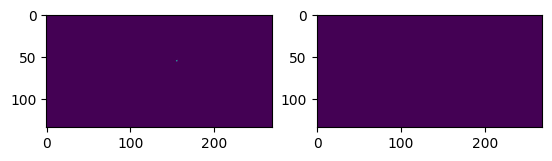

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2)
iid = 80
ax1.imshow(tmp[iid]._images[0])
ax2.imshow(scipy.signal.medfilt2d(tmp[iid]._images[0]))

plt.show()

### Running colocalization computation across datasets

In [75]:
with open('/g/alexandr/tim/sl_datasets_753.txt') as f:
    selected_datasets = f.read().split(',')

sm = metaspace.SMInstance()
    
for ds_id in tqdm(selected_datasets):
    if ds_id + '.pickle' not in os.listdir('/scratch/trose/metaspace_coloc/rc_coloc_753/'):
        ds = sm.dataset(id=ds_id)

        tmp = ds.all_annotation_images(fdr=0.1, 
                                       database=26, 
                                       only_first_isotope=False, 
                                       scale_intensity=False, 
                                       hotspot_clipping=False)

        ion_array = np.array([scipy.signal.medfilt2d(x._images[0], 
                                                     kernel_size=3).flatten() 
                              for x in tmp])
        df = pd.DataFrame(pairwise_kernels(ion_array, metric='cosine'), columns = [x.formula + x.adduct for x in tmp], index=[x.formula + x.adduct for x in tmp])
        df.to_pickle('/scratch/trose/metaspace_coloc/rc_coloc_753/' + ds_id + '.pickle')

100%|██████████| 753/753 [00:05<00:00, 143.49it/s]


In [73]:
ds_id+'.pickle' not in os.listdir('/scratch/trose/metaspace_coloc/rc_coloc_753/')

False

In [66]:
 os.listdir('/scratch/trose/metaspace_coloc/rc_coloc_753/')

['2022-09-24_00h10m42s.pickle',
 '2022-07-13_21h32m00s.pickle',
 '2021-09-17_22h36m14s.pickle',
 '2021-11-19_23h38m38s.pickle',
 '2021-08-09_18h34m16s.pickle',
 '2021-10-11_18h34m31s.pickle',
 '2021-09-27_21h46m14s.pickle',
 '2021-12-17_18h11m49s.pickle',
 '2021-11-19_23h17m05s.pickle',
 '2022-01-17_22h32m10s.pickle',
 '2021-08-16_23h37m34s.pickle',
 '2021-12-15_15h43m38s.pickle',
 '2021-09-14_18h57m03s.pickle',
 '2022-01-06_23h31m52s.pickle',
 '2021-08-06_18h19m45s.pickle',
 '2022-04-22_13h57m25s.pickle',
 '2022-01-07_13h33m50s.pickle',
 '2021-12-17_19h12m02s.pickle',
 '2021-12-01_18h49m56s.pickle',
 '2021-08-26_23h57m14s.pickle',
 '2021-08-20_21h53m32s.pickle',
 '2021-10-19_18h41m49s.pickle',
 '2021-10-11_21h07m40s.pickle',
 '2021-02-08_12h11m20s.pickle',
 '2021-11-19_23h36m20s.pickle',
 '2022-05-17_15h40m15s.pickle',
 '2021-10-22_19h04m24s.pickle',
 '2021-11-30_18h26m10s.pickle',
 '2022-01-06_23h29m37s.pickle',
 '2021-09-24_17h50m18s.pickle',
 '2022-01-31_18h54m49s.pickle',
 '2021-1

In [ ]:
ds = sm.dataset(id=ds_id)

tmp = ds.all_annotation_images(fdr=0.1, 
                               database=26, 
                               only_first_isotope=False, 
                               scale_intensity=False, 
                               hotspot_clipping=False)

ion_array = np.array([scipy.signal.medfilt2d(x._images[0], 
                                             kernel_size=3).flatten() 
                      for x in tmp])
df = pd.DataFrame(pairwise_kernels(ion_array, metric='cosine'), columns = [x.formula + x.adduct for x in tmp], index=[x.formula + x.adduct for x in tmp])